In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import calendar
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore') #remove warning

In [4]:
df = pd.read_csv("https://media.githubusercontent.com/media/DBertazioli/NeoMeetup/master/csv/exported_queries/Distribuzione_temporale_eventi_fix.csv")
df.head()

,Unnamed: 0,name,country,state,lat,lon,timezone_str,time,datetime_timezoned
0,0,Lunch meetup at Shanghai Slims 13th April Sat...,cn,cn,31.23,121.47,Asia/Shanghai,1.555128e+12,13/04/2019 12:00:00
1,1,"\t Meetup Salud M\u00f3vil, IA Salud - Observa...",co,co,6.25,-75.59,America/Bogota,1.554413e+12,04/04/2019 17:00:00
2,2,\t Rob Thomas: Chip Tooth Tour,us,co,39.70,-105.08,America/Denver,1.560213e+12,10/06/2019 19:00:00
3,3,\tHayden Island,us,or,45.44,-122.77,America/Los_Angeles,1.554568e+12,06/04/2019 10:00:00
4,4,\tNorth - University of Portland,us,or,45.44,-122.77,America/Los_Angeles,1.555173e+12,13/04/2019 10:00:00


In [5]:
tmp = df['datetime_timezoned'].str.split(" ", n = 1, expand = True) #create distinct columns date and time
df['day'] = [calendar.day_name[dt.strptime(date, '%d/%m/%Y').weekday()] for date in tmp[0]] #transform date into day
df['dtime'] = tmp[1] #take time
df.head()

,Unnamed: 0,name,country,state,lat,lon,timezone_str,time,datetime_timezoned,day,dtime
0,0,Lunch meetup at Shanghai Slims 13th April Sat...,cn,cn,31.23,121.47,Asia/Shanghai,1.555128e+12,13/04/2019 12:00:00,Saturday,12:00:00
1,1,"\t Meetup Salud M\u00f3vil, IA Salud - Observa...",co,co,6.25,-75.59,America/Bogota,1.554413e+12,04/04/2019 17:00:00,Thursday,17:00:00
2,2,\t Rob Thomas: Chip Tooth Tour,us,co,39.70,-105.08,America/Denver,1.560213e+12,10/06/2019 19:00:00,Monday,19:00:00
3,3,\tHayden Island,us,or,45.44,-122.77,America/Los_Angeles,1.554568e+12,06/04/2019 10:00:00,Saturday,10:00:00
4,4,\tNorth - University of Portland,us,or,45.44,-122.77,America/Los_Angeles,1.555173e+12,13/04/2019 10:00:00,Saturday,10:00:00


In [6]:
df_date = df[['day','dtime']] #define new dataframe for explore with viz
df_date.head() #check

,day,dtime
0,Saturday,12:00:00
1,Thursday,17:00:00
2,Monday,19:00:00
3,Saturday,10:00:00
4,Saturday,10:00:00


In [7]:
df_date['day'] = pd.Categorical(df_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
df_date['values'] = 1 #create a column that represent the single instance
pivot_table = df_date.pivot_table(values = 'values', index = 'day', columns = 'dtime', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number event is organized in a certain
#week's day, in a certain hour
pivot_table

dtime,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
day,,,,,,,,,,,,,,,,,,,,,
Monday,58,9,5,2,5,14,100,205,332,802,...,346,334,429,983,5422,11722,3111,524,110,23
Tuesday,51,4,3,3,5,40,107,577,1073,1266,...,483,440,640,1678,9969,18863,4539,784,99,53
Wednesday,40,6,7,8,6,26,126,898,1206,1536,...,559,510,639,1759,10818,19603,4852,693,155,40
Thursday,56,10,4,4,7,40,126,690,1311,1389,...,615,523,779,1880,10507,19433,4824,961,222,72
Friday,138,11,7,8,13,27,143,518,827,1257,...,605,687,812,1700,5072,10079,4731,1446,701,193
Saturday,156,46,27,19,20,70,308,1192,2931,6867,...,5169,3680,2588,2473,3628,6246,3492,1154,698,227
Sunday,81,16,11,14,14,41,145,548,1366,2978,...,4748,3443,2463,2167,2387,2686,867,244,81,67


In [ ]:
#only if are present nan or float 
#pivot_table = pivot_table.fillna(0)
#pivot_table = pivot_table.astype(int)

In [8]:
rcParams['figure.figsize'] = 18,12 #define a parameter to change the figure size

Text(141.0, 0.5, 'Weekdays')

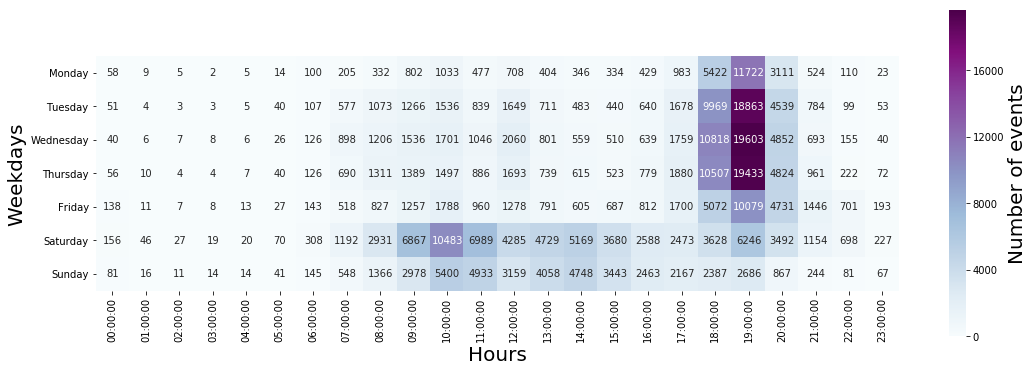

In [9]:
figure = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of events'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
figure.figure.axes[-1].yaxis.label.set_size(20)
figure.set_xlabel("Hours", fontsize=20)
figure.set_ylabel("Weekdays", fontsize=20)